<a href="https://colab.research.google.com/github/saktiworkstation/road-to-ai-developer/blob/main/Pre_Processing_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Studi kasus

* Kita akan menggunakan dataset diabetes.csv untuk memprediksi apakah seorang pasien menderita diabetes atau tidak.
* Dataset ini memiliki beberapa fitur seperti usia, tekanan darah, kadar glukosa, BMI, dll.
* Targetnya adalah apakah pasien mengidap diabetes atau tidak (1 untuk diabetes, 0 untuk tidak).

**Link download dataset (gunakan untuk latihan):**
**https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database**


Langkah-langkah yang akan dilakukan:
1. Preprocessing data (mengatasi nilai kosong, normalisasi, encoding).
2. Penerapan RandomForest untuk prediksi.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load Data

In [7]:
df = pd.read_csv('/content/diabetes.csv')

In [8]:
# Cek info awal mengenai data
print(df.info())
print("==========")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

# 2. Preprocessing Data

In [9]:
# Mengatasi nilai kosong (asumsikan nilai 0 pada kolom tertentu adalah nilai kosong yang perlu diganti)
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_with_zeros:
    df[column] = df[column].replace(0, np.nan)
    df[column] = df[column].fillna(df[column].median())

In [10]:
# Normalisasi data (StandardScaler)
scaler = StandardScaler()
x = df.drop('Outcome', axis=1)
y = df['Outcome']
x_scaled = scaler.fit_transform(x)

In [11]:
# Membagi data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

#  3. Training Model RandomForest

In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

# 4. Evaluasi Model

In [13]:
y_pred = model.predict(x_test)

# Menampilkan hasil evaluasi
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.7402597402597403

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154


Confusion Matrix:
 [[78 21]
 [19 36]]


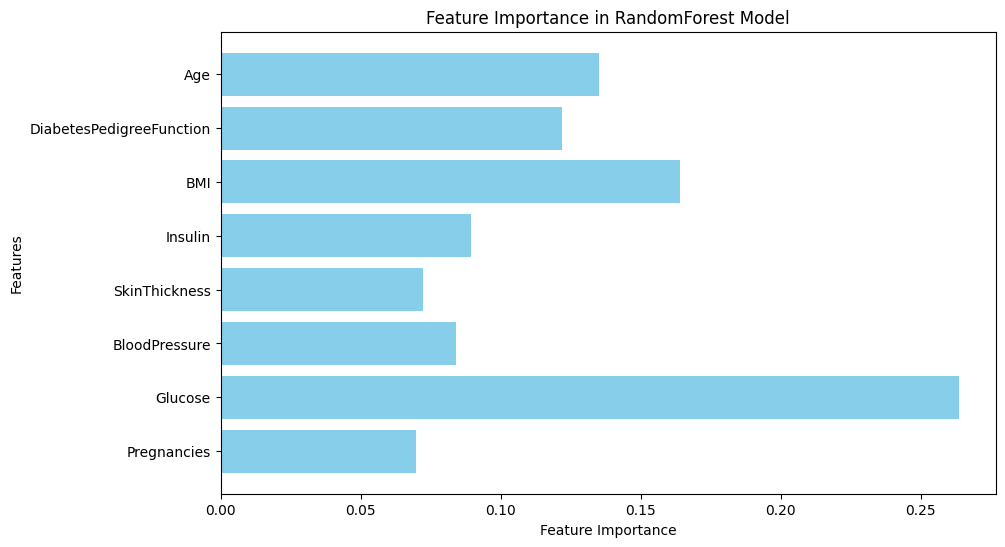

In [14]:
# Feature Importance
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
features = x.columns

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in RandomForest Model')
plt.show()